In [1]:
import numpy as np
import pandas as pd

<Axes: >

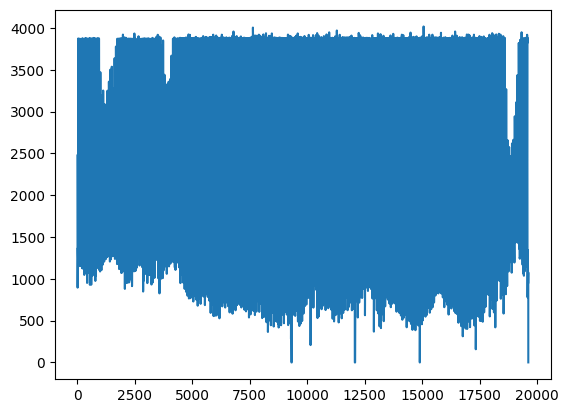

In [2]:
nasah_pulse_tkr = pd.read_csv("belom_diedit/nasah_pulse_tkr.csv",sep =";")
nasah = nasah_pulse_tkr['2944']
nasah.plot()

In [3]:
import neurokit2 as nk
nasah = nk.ppg_clean(nasah, sampling_rate=100, method='elgendi')

In [4]:
med = nasah.max()/4
med

610.8943923115785

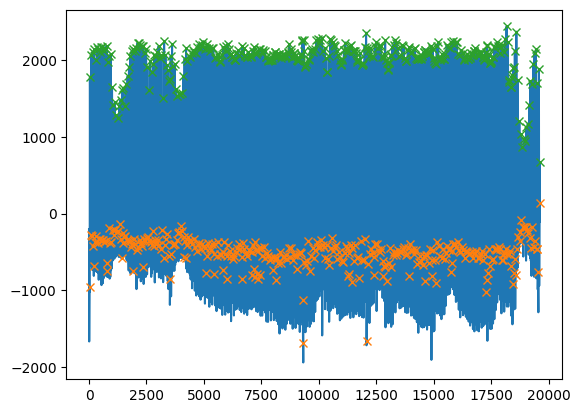

In [5]:
def diastol(signal, median=med):

  peaks = []
  for i in range(1, len(signal) - 1):
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] < median:
      peaks.append(i)

  return peaks

def sistol(signal, median=med):

  peaks = []
  for i in range(1, len(signal) - 1):
    if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] > median:
      peaks.append(i)

  return peaks


# signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 1000))
# signal = np.sin(2 * np.pi * 5 * np.linspace(0, 1, 1000)) + np.sin(2 * np.pi * 10 * np.linspace(0, 1, 1000))

peaks_diastol = diastol(nasah)
peaks_sistol = sistol(nasah)


import matplotlib.pyplot as plt
plt.plot(nasah);
plt.plot(peaks_diastol, nasah[peaks_diastol], "x");
plt.plot(peaks_sistol, nasah[peaks_sistol], "x");


In [13]:
pd.DataFrame(nasah[peaks_diastol]).mean()

0   -505.420596
dtype: float64

In [80]:
nasah = pd.DataFrame(nasah)

In [81]:
nasah['angka'] = np.arange(0,len(nasah))

In [85]:
peak_heigh_sistol = []
for i in peaks_sistol:
    nasah1 = nasah[(nasah.angka ==i)]
    peak_heigh_sistol.append(float(nasah1[0]))


peak_heigh_sistol = pd.DataFrame(peak_heigh_sistol).mean()

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_2832\2239302554.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  peak_heigh_sistol.append(float(nasah1[0]))


In [86]:
peak_heigh_diastol = []
for i in peaks_diastol:
    nasah1 = nasah[(nasah.angka ==i)]
    peak_heigh_diastol.append(float(nasah1[0]))


peak_heigh_diastol = pd.DataFrame(peak_heigh_diastol).mean()

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_2832\3703814813.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  peak_heigh_diastol.append(float(nasah1[0]))


In [87]:
peak_heigh_sistol

0    2052.246406
dtype: float64

In [88]:
peak_heigh_diastol

0   -472.202087
dtype: float64

In [48]:
peak_heigh

,0
0,1.760043
1,1.759734
2,1.759873
3,1.760113
4,1.760169
